In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('/content/Apple-Fitness-Data.csv')

In [ ]:
df

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184
...,...,...,...,...,...,...,...,...
144,2023-04-01,16:04:23,87,0.05872,13.162,3,0.298,5.364
145,2023-04-01,16:33:18,37,0.02039,4.135,1,0.295,5.400
146,2023-04-01,16:49:49,969,0.65379,31.416,3,0.274,5.292
147,2023-04-01,17:09:06,640,0.42356,13.250,6,0.282,4.860


In [ ]:
df.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [ ]:
df.isna().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [ ]:
df.describe()

,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,224.959732,0.147963,14.497933,2.463087,0.298470,3.973772
std,277.919390,0.181177,9.607919,1.570520,0.022408,1.049368
min,1.000000,0.000460,0.171000,1.000000,0.261000,1.548000
25%,22.000000,0.014020,12.621000,1.000000,0.279000,3.312000
50%,89.000000,0.062900,14.422000,3.000000,0.295000,4.140000
75%,365.000000,0.219000,15.441000,3.000000,0.317000,4.896000
max,1082.000000,0.701180,60.514000,13.000000,0.354000,5.580000


Text(0.5, 1.0, 'Step Count Over Time')

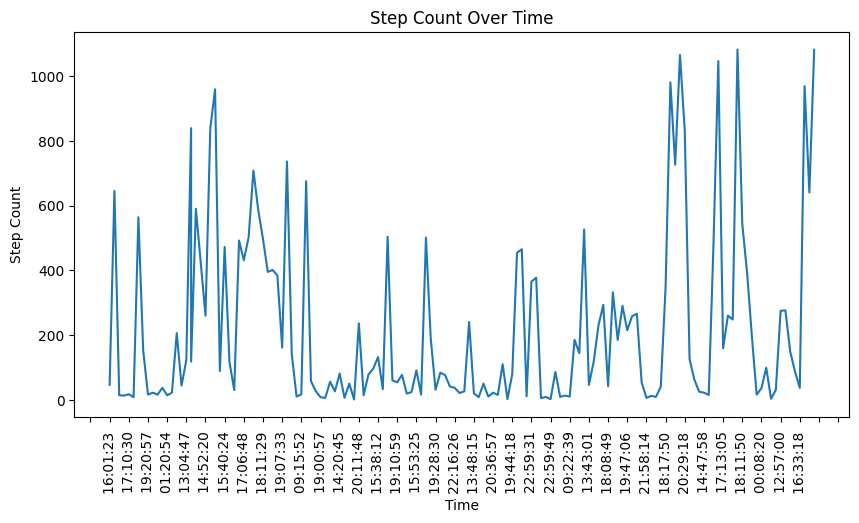

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Time'], df['Step Count'])

plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(50))

plt.xlabel('Time')
plt.ylabel('Step Count')
plt.title('Step Count Over Time')

Text(0.5, 1.0, 'Energy Burned Over Time')

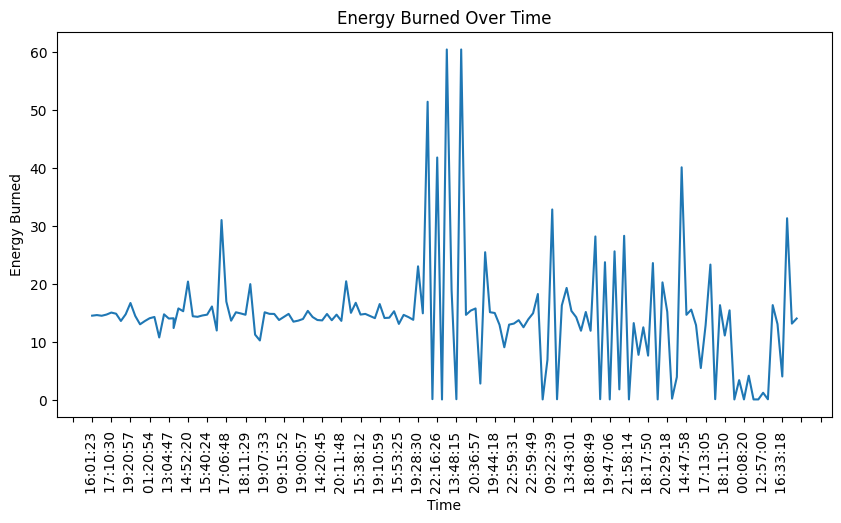

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Time'], df['Energy Burned'])

plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(50))

plt.xlabel('Time')
plt.ylabel('Energy Burned')
plt.title('Energy Burned Over Time')

Text(0.5, 1.0, 'Walking Speed Over Time')

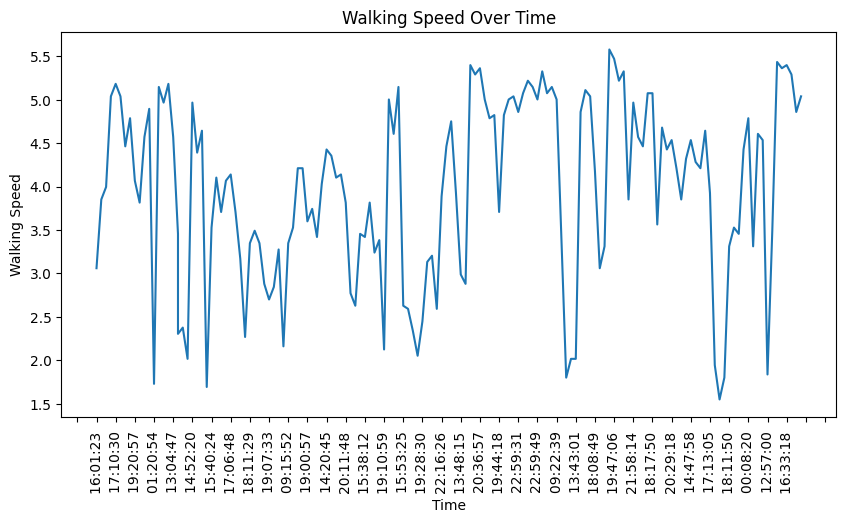

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Time'], df['Walking Speed'])

plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(50))

plt.xlabel('Time')
plt.ylabel('Walking Speed')
plt.title('Walking Speed Over Time')

Text(0.5, 1.0, 'Walking Speed & Energy Burned')

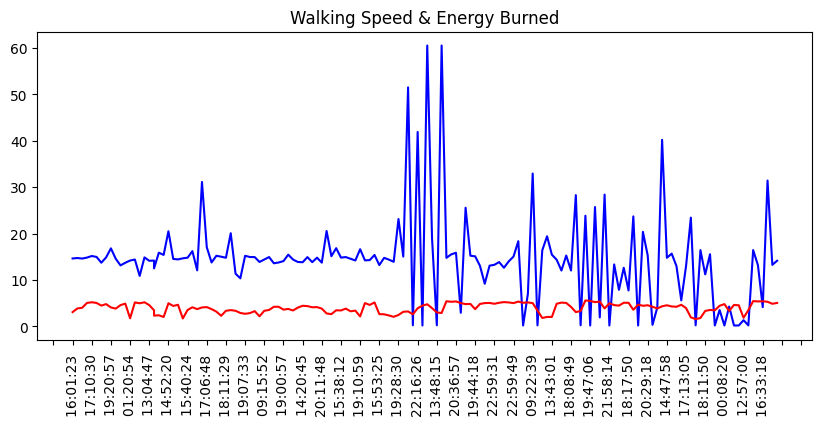

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df['Time'], df['Energy Burned'], color='blue', label='Energy Burned')
plt.plot(df['Time'], df['Walking Speed'], color='red', label='Walking Speed')

plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(50))
plt.title('Walking Speed & Energy Burned')

Text(0.5, 1.0, 'Average Step Count per Day')

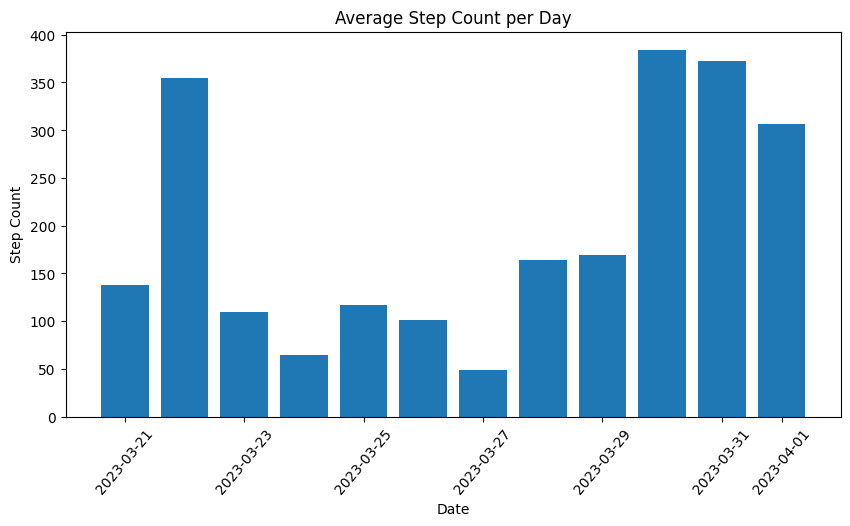

In [ ]:
step_count_per_day = df.groupby('Date')['Step Count'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(step_count_per_day['Date'], step_count_per_day['Step Count'])

plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Average Step Count per Day')

Text(0.5, 1.0, 'Total Flights Climbed per Day')

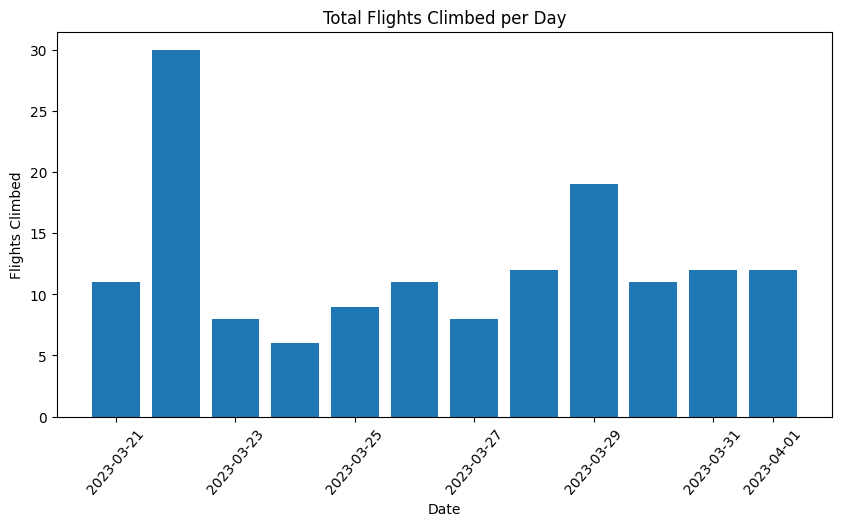

In [ ]:
Flights_climbed_per_day = df.groupby('Date')['Flights Climbed'].count().reset_index()

plt.figure(figsize=(10,5))
plt.bar(Flights_climbed_per_day['Date'], Flights_climbed_per_day['Flights Climbed'])

plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Flights Climbed')
plt.title('Total Flights Climbed per Day')

In [ ]:
time_intervals = pd.cut(pd.to_datetime(df['Time']).dt.hour,
                        bins = [0, 12, 18, 24],
                        labels = ['Morning', 'Afternoon', 'Evening'],
                        right = False)
df['time_interval'] = time_intervals
df['time_interval']

0      Afternoon
1      Afternoon
2      Afternoon
3      Afternoon
4      Afternoon
         ...    
144    Afternoon
145    Afternoon
146    Afternoon
147    Afternoon
148    Afternoon
Name: time_interval, Length: 149, dtype: category
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']

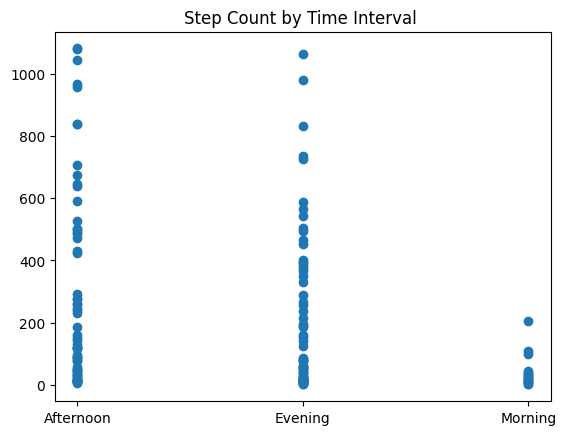

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df['time_interval'], df['Step Count'])
plt.title('Step Count by Time Interval ')
plt.show()

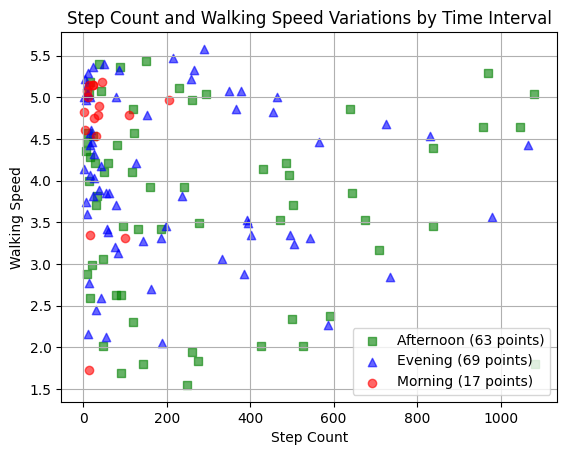

In [ ]:
colors = {'Morning': 'red', 'Afternoon': 'green', 'Evening': 'blue'}
markers = {'Morning': 'o', 'Afternoon': 's', 'Evening': '^'}

for category in df['time_interval'].unique():
  subset = df['time_interval'] == category
  plt.scatter(
        df['Step Count'][subset],
        df['Walking Speed'][subset],
        c=colors[category],
        marker=markers[category],
        label=f'{category.capitalize()} ({sum(subset)} points)',
        alpha=0.6,
    )

plt.xlabel('Step Count')
plt.ylabel('Walking Speed')
plt.title('Step Count and Walking Speed Variations by Time Interval')
plt.legend()

plt.grid(True)
plt.show()